## Project - Customer Segmentation Analysis 
## Pramit Shetul Parikh

### Q. What is Customer Segmentation and why is it important from a marketing perspective?

Q. What is Customer Segmentation and why is it important from a marketing perspective?
A. Customer segmentation is the process of identifying and understanding the different groups of customers who use a product or service. By understanding these groups, businesses can develop strategies that are tailored specifically to their needs. There are a few key factors to consider when segmenting customers. These factors include the type of product or service being offered, the geographical location of the customers, and the level of spending.
When segmenting a product or service, businesses should consider the following:
- What type of product or service is being offered?
- What demographic groups are using it?
- What are their needs and wants?
- What are the barriers to purchasing

Segmentation enables companies to focus their marketing efforts on the most important customers, and to develop more personalized marketing messages and offers. It also helps companies identify and respond to customer needs and preferences more effectively. By targeting the right customers, companies can achieve a number of benefits. They can increase sales and profits by targeting the right groups of customers with the right products and services. They can also build a loyal customer base that is more likely to recommend the company

## Import Libraries and Data

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Check encoding in the dataset because if you load the dataset without encoding an error will occur

### 'rb' means read in the file as binary

In [2]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.shape

(541909, 8)

In [5]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
 ### Remove Null Values
 ### Remove Duplicate Values

In [6]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [7]:
data.shape

(406829, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [11]:
filtered_data.shape

(4380, 2)

In [12]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [13]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights

#### Can we look at Top 10 country customer data

In [14]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [15]:
filtered_data.Country.value_counts()[:10]

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries')

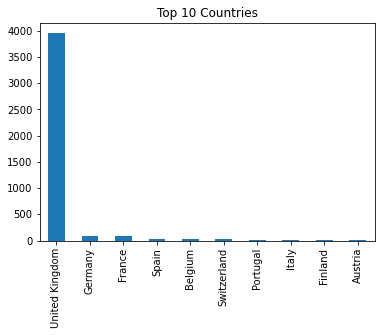

In [16]:

#filtered_data.Country.value_counts()[:10]
df = filtered_data.Country.value_counts()[:10]
df.plot.bar()
plt.title('Top 10 Countries')

### Q. What do you observe?

From the above graph, it shows that the united kingdom has the highest number of customer followed by Germany, France and other countries.

In [17]:
uk_data=data[data.Country=='United Kingdom']

In [18]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


### Q. What do you observe? Which column needs special attention?

A. Here in this table, the quantity column has a mean of 11.077, and there are also data anomalies in the quantity column. There is a minimum value of -80995, which doesn't make sense, how can quantity have a negative value associated with it? So here that has to be removed. Also because there are so many variations in quantity, to monitor recency, frequency and monetory gain, we will group customers based on quantity, so we can define a range for quantity as well if needed and then group customers based on that. Unit price minimum value is also 0 which is not appropriate value.

So from this quantity and unit price needs a special attention.

In [19]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [20]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [21]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [23]:
# Calculate Total Price (Quantity) * Unit Price

In [24]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [25]:
uk_data['TotalPrice']

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
Name: TotalPrice, Length: 354345, dtype: float64

## Time frame of data

In [26]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


In [27]:
uk_data['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541889    12/9/2011 12:31
541890    12/9/2011 12:49
541891    12/9/2011 12:49
541892    12/9/2011 12:49
541893    12/9/2011 12:49
Name: InvoiceDate, Length: 354345, dtype: object

### Q. Comment on the above results.

In the InvoiceDate Feature the minimum date is 1/10/2011 and the maximum date is 9/9/2011 however the actual date for the InvoiceDate is goes back to 2010 and the 12 monthh and also there the date which goes upto 12 month of 2011.

###  Perform RFM Analysis

For Recency, Calculate the number of days between present date and date of last purchase for each customer.

For Frequency, Calculate the number of orders for each customer.

For Monetary, Calculate sum of purchase price for each customer

In [28]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [29]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [30]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [31]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results

The above output conveys the total number of items by invoice number.

In [32]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [33]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [34]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [35]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [36]:
rfm['recency'] = rfm['recency'].astype(int)

In [37]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [38]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


### Q. What is wrong with this table think ??

From the above table,  it shows that the columns monteary and recencey have misplaced so due to that wrong assumption occur. So here we have a very large range of data here spread across our variables of interest, so in order to have the correct RFM score we need to bring monetary, frequency and recency into appropriate ranges.

In [39]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

### Create Visuals

1) Histogram for Recency Data

2) Histogram for Frequency Data

3) Histogram for Monetary Data

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

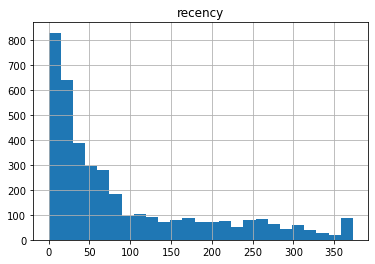

In [40]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

### Q. What does this above chart tell ?

So based on the recency histogram, we can see that most of the business' customer's interacted with us recently and old customers are less.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

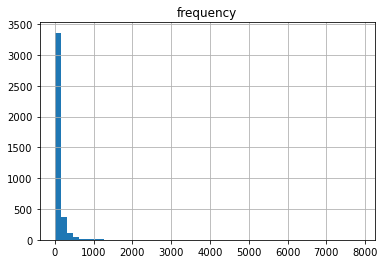

In [41]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

### Q. What does this above chart tell ?

A. So based on this distribution we can note that our business does not receive customer's that frequently.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

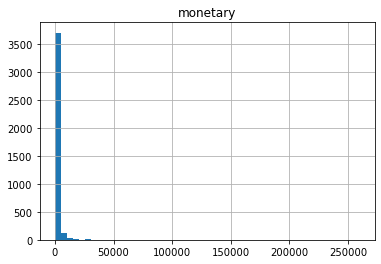

In [42]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

In [43]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,16,488,5681
14110.0,3,156,5683
13468.0,1,302,5704
16553.0,163,84,5719
13178.0,26,265,5725
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


## Histogram for Monetary Data (UK)

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

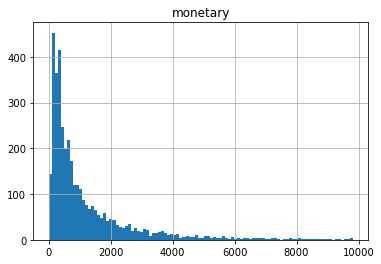

In [44]:
rfm.hist(column='monetary', bins=100)

### Q. What does this above chart tell ?

A. Based on this distribution we can see that the business has a higher frequency of less monetary gain. Customers spend largers amounts than $2000 less frequently.

In [45]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score

In [46]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [47]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions


In [48]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [49]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))


C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\3713573209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\3713573209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\3713573209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [50]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()


C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\413564351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)


,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,14,1,0,5,1,1,511
16738.0,297,1,3,1,1,1,111
16454.0,44,2,6,3,1,1,311
14792.0,63,2,6,3,1,1,311
17956.0,249,1,12,1,1,1,111


In [51]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\1017118094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\1017118094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,3,1,1,311,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [52]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts


can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

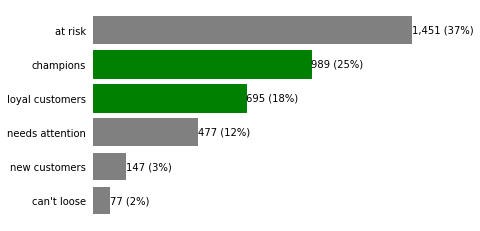

In [53]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Q. Comment on the above chart

A. So here we have divided customer's into 5 segments based on their probability of staying or leaving the business. We can see that the customers highlighted in the green segment our the ones we don't need to focus on, they are loyal and consistent for our business, but we need to focus on customer's which are at risk and need attention. The ratio of customer's at risk is very high (37%), so we need to focus on customer retention more.

### Q. Who are the best customers?

A. Here, we can see that based on RFM score ,our top 5 customers are 13001, 13199, 15078. 13458 and 16523.¶

In [54]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
16523.0,1,290,9418,5,5,5,555,champions


### Q. Which customers are likely to churn?

A. From the below table, the customerID = 15032.0 have the lowest recency is low which is 256 are more likely to churn.

In [55]:
#Customers who's recency value is low

In [56]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose
15032.0,256,52,4959,1,3,5,135,at risk
15808.0,306,208,3734,1,5,5,155,can't loose
17230.0,264,69,3638,1,4,5,145,at risk


### Q. Which customers we are going to loose?

A. CustomerID 13747 and 15070 are potentially at risk being loose.


In [57]:
#Customers who's recency, frequency and monetary values are low

In [58]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk
15070.0,372,1,106,1,1,1,111,at risk


### Q. Who are the loyal customers?

A. CustomerID 15078, 13458, 13001 are the most loyal customer who frequently purhasing the product.

In [59]:
#Customers with high frequency value

In [60]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
14733.0,16,202,9585,4,5,5,455,loyal customers


### Calculate RFM scores using 4 quartiles and answer all the questions again

Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6

In [61]:
# Use quartiles to to make 5 equal parts based on the available values. Each quartiles contains 25% of the population. 
quartiles = rfm[['recency', 'frequency', 'monetary']].quantile([0.25, 0.50, 0.75]).to_dict()
quartiles

{'recency': {0.25: 18.0, 0.5: 51.5, 0.75: 147.0},
 'frequency': {0.25: 16.0, 0.5: 40.0, 0.75: 95.0},
 'monetary': {0.25: 293.0, 0.5: 628.0, 0.75: 1476.0}}

In [62]:
def r_score(x):
    if x <= quartiles['recency'][0.25]:
        return 4
    elif x <= quartiles['recency'][0.50]:
        return 3
    elif x <= quartiles['recency'][0.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quartiles[c][0.25]:
        return 1
    elif x <= quartiles[c][0.50]:
        return 2
    elif x <= quartiles[c][0.75]:
        return 3
    else:
        return 4 

In [63]:
 #Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\4206862719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\4206862719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\4206862719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [64]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\1662531255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,4,1,1,411,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,2,1,1,211,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [65]:
## Create the customer segments based on your knowledge. 
# Create segments based on R and F scores

segment = {
   '[1-2][1-4]': 'at risk',
    '[3-4][1-3]': 'can\'t loose',
    '3[4]': 'needs attention/ new customers ',
    '4[4]': 'loyal customers/ champions',
    #'[4-5]1': 'new customers',
    #'[4-5][2-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segment, regex=True)
rfm.head()

C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\4154465757.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
C:\Users\devpa\AppData\Local\Temp\ipykernel_10956\4154465757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Segment'] = rfm['Segment'].replace(segment, regex=True)


,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,4,1,1,411,can't loose
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,can't loose
14792.0,63,2,6,2,1,1,211,at risk
17956.0,249,1,12,1,1,1,111,at risk


In [66]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts


needs attention/ new customers      288
loyal customers/ champions          474
can't loose                        1156
at risk                            1918
Name: Segment, dtype: int64

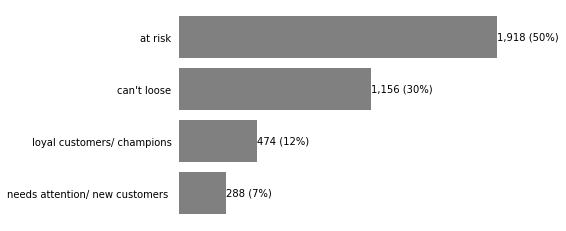

In [67]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('greens')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

###  Q. Who are the best customers?

In [68]:
rfm[rfm['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,4,4,4,444,loyal customers/ champions
13199.0,3,119,9817,4,4,4,444,loyal customers/ champions
15078.0,7,440,9743,4,4,4,444,loyal customers/ champions
13458.0,7,382,9646,4,4,4,444,loyal customers/ champions
14733.0,16,202,9585,4,4,4,444,loyal customers/ champions


### Q. Which customers are likely to churn?

In [69]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,4,4,144,at risk
12980.0,157,20,7374,1,2,4,124,at risk
16553.0,163,84,5719,1,3,4,134,at risk
17850.0,372,297,5391,1,4,4,144,at risk
15032.0,256,52,4959,1,3,4,134,at risk


### Q. Which customers we are going to loose?

In [70]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
13065.0,373,14,205,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
16048.0,373,8,256,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk


### Q. Who are the loyal customers?

In [71]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,4,4,4,444,loyal customers/ champions
13199.0,3,119,9817,4,4,4,444,loyal customers/ champions
15078.0,7,440,9743,4,4,4,444,loyal customers/ champions
13458.0,7,382,9646,4,4,4,444,loyal customers/ champions
14733.0,16,202,9585,4,4,4,444,loyal customers/ champions


## Customer Segmentation Analysis Part 2

In [72]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [73]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [74]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8405400>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a8405a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a8405130>,
 'medians': [<matplotlib.lines.Line2D at 0x1f9a8405f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a847c250>,
 'means': []}

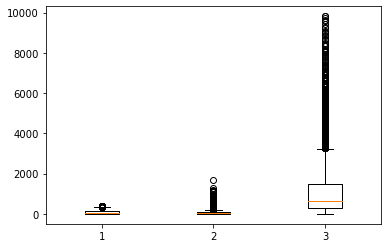

In [75]:
# Create box plots to check for outliers
plt.boxplot(rfm)

In [76]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [77]:
rfm_clean = rfm[(z < 3).all(axis=1)]

In [78]:
rfm_clean

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12
...,...,...,...
18225.0,3,271,5509
15805.0,23,301,5528
16767.0,30,222,5580


## Q. What is the purpose of the above code

A. So in the above code we are filtering out all the rfm values which have a Z-score less than 3. We initially created a boxplot to find the outlier values. We did this so we can have more accurate clustering and remove data points which we don't need. Here we don't want data in clusters whose rfm value is less than 3 so we've filtered them out.

In [79]:
rfm.shape

(3836, 3)

In [80]:
rfm_clean.shape

(3683, 3)

## Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9a8321c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9a83210d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9a831aa00>,
 'medians': [<matplotlib.lines.Line2D at 0x1f9a82cdca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f9a82cdfa0>,
 'means': []}

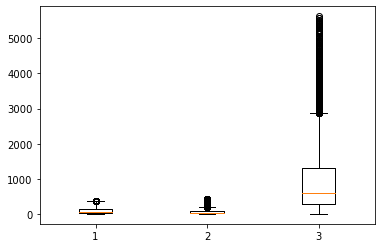

In [81]:
plt.boxplot(rfm_clean)

A. So based on the new cleaned data, we can observe that the overall data range has changed from 10000 to 5000, so we've removed significant outliers to have more accurate clusters.

## Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

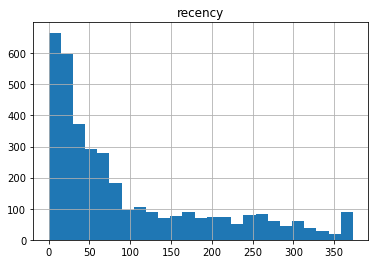

In [82]:
rfm_clean.hist(column='recency', bins=25)

A. Recency Chart - So here even after removing outliers, we don't see much difference between both recency histograms. Most customers don't show up for a long time and around 300-700 customers have showed up within the last 50 days which is not a good recency distribution.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

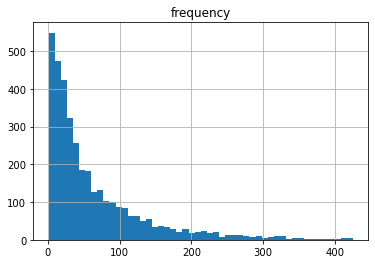

In [83]:
rfm_clean.hist(column='frequency', bins=50)

Frequency Chart - So here on changing the data range and filtering we can see that we get more precise information on the purchase frequency of customers. Based on the spread of the data we can see that most of the customers have a purchase frequency between 1 to 100.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

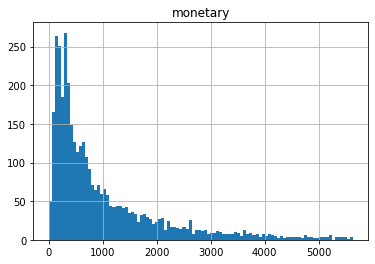

In [84]:
rfm_clean.hist(column='monetary', bins=100)

Monetary Chart - So based on the monetary histograms we can see that most customers spend less than a 1000 dollars and only a few go above that threshold, less frequently.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [85]:
X = rfm

In [86]:
X

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


In [87]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


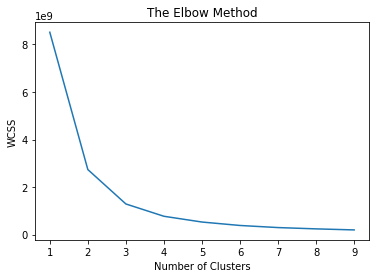

In [88]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [90]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [91]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [92]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,1
16738.0,297,1,3,1
16454.0,44,2,6,1
14792.0,63,2,6,1
17956.0,249,1,12,1


## Plot the graphs

C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


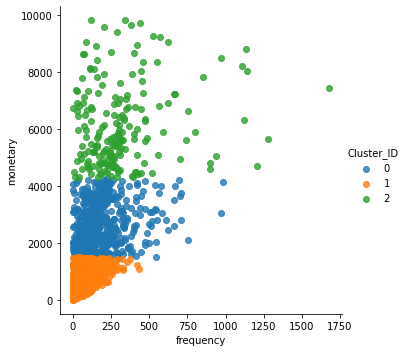

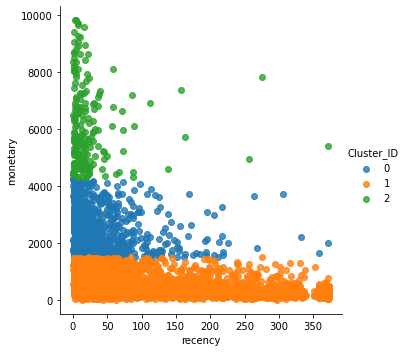

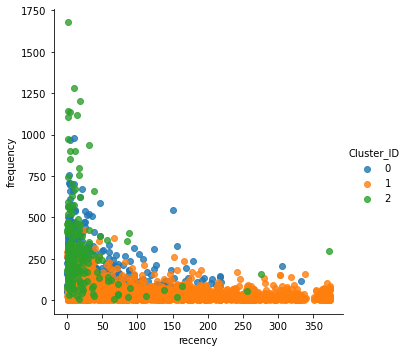

In [93]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## Q. Comment on the plots

##### Chart 1: Monetary VS Frequency

In this chart category 1 has the customer who like to spend more which ranges from 4000 to 10000 with the frequency between 0 and 1250 with more outliers. The category 2 has the customer who spending medium in the amount range from 1800 to 4000 with the freuency between 1to 750 the very less outliers. The category 0 has the who spending low in the amount range from 1 to 1800 with the frequency less than 500. From this observation we firmly believe that the customer who spending medium are the best customer because they comparatively concentrated in the category 2 with few outliers.

##### Chart 2: Monetary VS Recency

In this chart category 1 we can called it as Higher-Spending customer who like to spend more which amount ranges from 4000 to 10000 with recency of less than 50 days which is low recency and with lot of outliers. The category 2 we can called it as Medium customer who liked to spend not less or more in the amount range from 1800 to 4000 with recency between 1 t 200 with few outliers. The category 0 called lowest customer who likes to spend very low which amount ranges from 1 to 1800 with the recency about 350 days. We concluded that the customer which are category 2 are the best customer resides more customer with low ouliers.

##### Chart 2: Frequency VS Recency
Hence from this chart we can say that the relationship is not clear to interpert because the all the categories are overlapping with each other.


## Q. Perform Cluster Analysis with k=4

In [107]:
# Fitting K Means to the Datatset using k = 4V

kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)

In [108]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [109]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [110]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


## Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\devpa\anaconda3\envs\DAB200\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


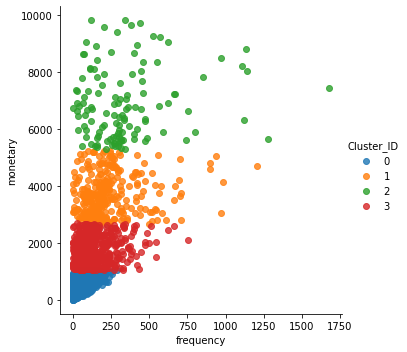

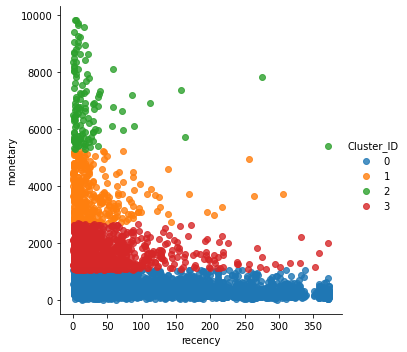

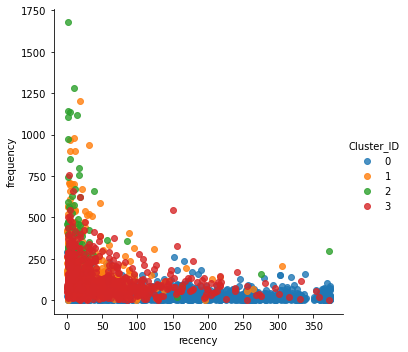

In [111]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

##### Chart 1 : Monetary VS Frequency

In this chart we can see the category 4 in which amount ranges from 5000 to 10000 with frequency between 0 and 1250 with extreme more oultiers. Category 3 the customer who spends not more or less in which amount ranges from 1500 to 3000 with frequency between 0 and less than 500 with extreme less outliers. Category 1 are the lowest spending customers which amount ranges from 0 to 1000 with frequency less then 250 with zero outliers. Category 2 data are most concentrated with range from 2500 to 5000 with the frequency 0 to 1000 with less outliers. We can say that the category 3 is best customer category where data is more concentarted and the category 2 also somewhat following sames category 3.

##### Chart2 : Monetary VS Recency

In this chart the new category 3 has the most concentrated data in which amount ranges from 1000 to less than 2500 with recency between 0 and 100 with few oultiers.

##### Chart3 : Monetary VS Recency
Even after increasing the k-value to create the new category still there is no clarity between this categories from the figure.


## Calculate mean for every cluster

In [114]:
for i in range(4): 
    rfm_clean_mean= rfm_clean.groupby(rfm['Cluster_ID']).mean()

In [115]:
rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,119.653649,35.006706,425.629191
1,33.529210,178.285223,3655.371134
2,34.647059,239.000000,5445.941176
3,49.314286,108.784524,1688.160714
